In [1]:
import pandas as pd
df = pd.read_csv('../assets/data/standardized.txt')
print(df.shape)
df.head()

(3701, 20)


,player,season,completions,passatt,passyards,passtds,ints,sacks,sackyards,rushatt,rushyards,rushtds,fumbles,touches,cmp%,ny/a,ypc,rush-split,td:touch,to:touch
0,Joe Flacco,2013,24,35,251,1,0,2.0,14.0,4,7,0,1,0.124003,0.545652,-0.095406,-0.278591,-0.210992,-0.622637,-0.318536
1,Ben Roethlisberger,2013,28,44,257,2,0,0.0,0.0,1,11,0,0,0.497263,0.083174,-0.371454,1.983181,-0.081674,-0.029683,-1.058624
2,Tony Romo,2013,23,32,225,1,0,2.0,17.0,1,-1,0,1,-0.435888,0.855238,-0.236125,-0.951009,-0.561799,-0.499009,-0.191663
3,Matthew Stafford,2013,22,35,330,3,2,1.0,10.0,1,8,0,1,-0.249258,0.010152,1.119054,1.249634,-0.255977,1.053573,1.401670
4,Tom Brady,2013,34,50,344,3,0,3.0,20.0,2,0,0,2,1.430413,0.492102,-0.238296,-0.706494,-0.511240,0.268980,0.044780


In [2]:
# prepare to split into train/test matrices
from sklearn.model_selection import train_test_split

y_col = 'player'
labels = df[y_col].unique()
X_cols = ['touches', 'cmp%', 'ny/a', 'ypc', 'rush-split', 'td:touch', 'to:touch']

labels

array(['Joe Flacco', 'Ben Roethlisberger', 'Tony Romo',
       'Matthew Stafford', 'Tom Brady', 'Ryan Fitzpatrick', 'Eli Manning',
       'Peyton Manning', 'Cam Newton', 'Carson Palmer', 'Philip Rivers',
       'Alex Smith', 'Drew Brees', 'Matt Ryan', 'Matt Cassel',
       'Andy Dalton', 'Matt Schaub', 'Russell Wilson', 'Jay Cutler',
       'Matt Hasselbeck', 'Michael Vick', 'Brett Favre', 'Aaron Rodgers'],
      dtype=object)

## How We'll Do Logistic Regression

The idea is for one of the players of the game to assemble a handful of these logistic regression classifiers at a time. So even though sklearn's implementation can do one vs all out of the box, we'll be reinventing the wheel a bit

In [3]:
from sklearn.linear_model import LogisticRegression

def wrangle(df, p, sel):
    df = df.copy()
    df['player'] = (df['player'] == p).astype(int)
    train, test = train_test_split(df,
                                   test_size=0.2,
                                   stratify=df['player'],
                                   random_state=143)
    return train[sel], test[sel]

models = {}
for p in labels:
    X_train, X_test = wrangle(df, p, X_cols)
    y_train, y_test = wrangle(df, p, y_col)
    model = LogisticRegression(
        class_weight='balanced',
        n_jobs=-1,
        random_state=143
    )
    model.fit(X_train, y_train)
    models[p] = [model, model.score(X_test, y_test)]

for k in models:
    print(k, models[k][1])

/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

Joe Flacco 0.5802968960863698
Ben Roethlisberger 0.5425101214574899
Tony Romo 0.5573549257759784
Matthew Stafford 0.6450742240215924
Tom Brady 0.5721997300944669
Ryan Fitzpatrick 0.6923076923076923
Eli Manning 0.5775978407557355
Peyton Manning 0.631578947368421
Cam Newton 0.8825910931174089
Carson Palmer 0.5006747638326585
Philip Rivers 0.5371120107962213
Alex Smith 0.6747638326585695
Drew Brees 0.6356275303643725
Matt Ryan 0.5452091767881242
Matt Cassel 0.728744939271255
Andy Dalton 0.582995951417004
Matt Schaub 0.6410256410256411
Russell Wilson 0.7638326585695007
Jay Cutler 0.6869095816464238
Matt Hasselbeck 0.6086369770580297
Michael Vick 0.8556005398110661
Brett Favre 0.5398110661268556
Aaron Rodgers 0.6869095816464238


/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/chris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


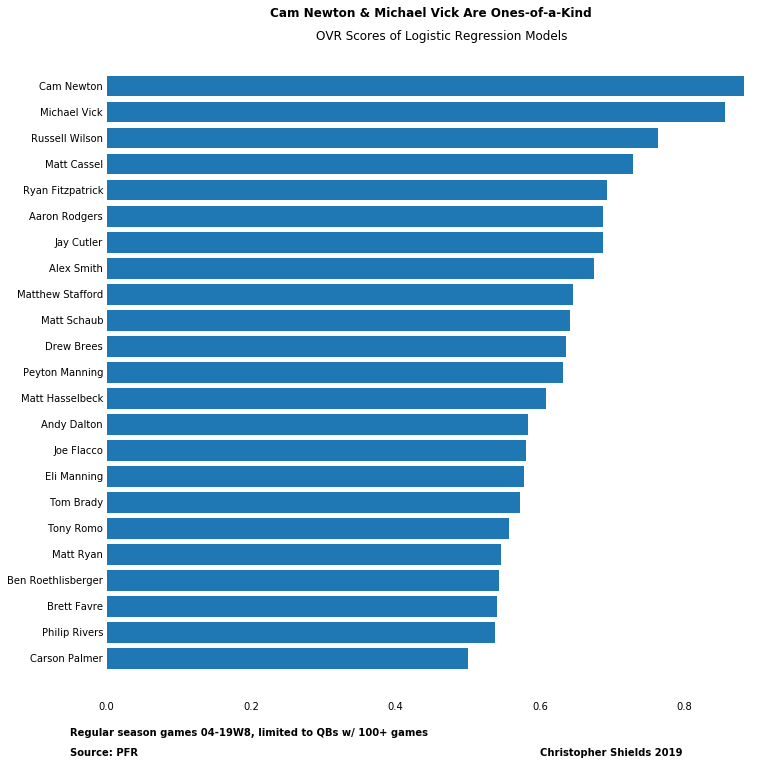

In [22]:
# visualize skill of each logistic regressor
import matplotlib.pyplot as plt
smods = [(p, models[p][1]) for p in models]
smods.sort(key=lambda x: x[1])
x = [_[0] for _ in smods]
y = [_[1] for _ in smods]
plt.figure(figsize=(12,12))
plt.suptitle('Cam Newton & Michael Vick Are Ones-of-a-Kind',
             fontweight='bold',
             y=0.925)
plt.title('OVR Scores of Logistic Regression Models')
plt.barh(x, y)
ax = plt.axes()
ax.tick_params(axis='both', length=0)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.text(-0.05, -3, 'Regular season games 04-19W8, limited to QBs w/ 100+ games',
         fontweight='bold')
plt.text(-0.05, -3.75, 'Source: PFR', fontweight='bold')
plt.text(0.6, -3.75, 'Christopher Shields 2019', fontweight='bold')
plt.savefig('../assets/ovr-lrs.png')
plt.show()

In [23]:
# save each logistic regressor
import pickle
for p in models:
    fn = p.replace(' ', '')
    pickle.dump(models[p][0], open(f'../assets/models/lrs/{fn}.pkl', 'wb'))

In [24]:
def ovr_lr(rows, models):
    probs = [models[qb][0].predict_proba(rows)[0][0] for qb in models]
    lbld = list(zip(models.keys(), probs))
    sums = sum([x[1] for x in lbld])
    divd = {x[0]:x[1]/sums for x in lbld}
    return divd

def get_scores(X, models):
    scores = X.apply(lambda x: ovr_lr([x], models), axis=1)
    mapped = [list(x.values()) for x in scores]
    return mapped

df_train, df_test = train_test_split(df,
                                     test_size=0.2,
                                     stratify=df[y_col],
                                     random_state=143)

X_train = df_train[X_cols]
X_test = df_test[X_cols]
y_train = df_train[y_col]
y_test = df_test[y_col]

y_scores = get_scores(X_test, models)
y_scores

[[0.03467664085216936,
  0.043820198588384436,
  0.0395144597847399,
  0.04575595625288332,
  0.043144465512295185,
  0.04357517337064479,
  0.04067388374115692,
  0.040974699309072375,
  0.04710782172887518,
  0.03606316282952116,
  0.0359241155267428,
  0.045028742743537194,
  0.05601202979395254,
  0.045862029422518616,
  0.042768725796420035,
  0.04018315245334615,
  0.032703159866779095,
  0.05058153232101258,
  0.044233854453664324,
  0.04013637580157683,
  0.05853867132173073,
  0.039089754804676725,
  0.05363139372429984],
 [0.04666117309315363,
  0.032538751874746745,
  0.03836405460759361,
  0.05485949337098961,
  0.04809170967812132,
  0.03231965311222873,
  0.03731277970243701,
  0.036626866327790955,
  0.05722103829172393,
  0.033605630155428334,
  0.030386799212809023,
  0.0513299436747038,
  0.051535283489809014,
  0.04156372948832791,
  0.047614757379848834,
  0.042044814037601005,
  0.02364451196064285,
  0.04576188300127971,
  0.04053653004849921,
  0.0442508623100605

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
pd.set_option('display.max_rows', None)
y_test_bin = label_binarize(y_test, classes=labels)
roc_auc_score(y_test_bin, y_scores)

0.3029513242442537

## In Conclusion

This garden of binary logistic regression classifiers is definitely distinguishing classes, but it keeps getting the answers wrong (which isn't that surprising; it's a hard problem!)